In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
def calculate_iou(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2
    
    # 겹치는 부분 좌표 계산
    x_intersection = max(x1, x2)  # 윗상단 x
    y_intersection = max(y1, y2)  # 윗상단 y
    x_union = min(x1 + w1, x2 + w2)  # 아래상단 x
    y_union = min(y1 + h1, y2 + h2)  # 아래상단 y
    
    intersection_area = max(0, x_union - x_intersection) * max(0, y_union - y_intersection)
    box1_area = w1 * h1
    box2_area = w2 * h2
    
    iou = intersection_area / float(box1_area + box2_area - intersection_area)
    # float >> 소수점 이하의 연산이 가능해져 좀더 좋은 iou를 구할 수 있음
    return iou

In [13]:
def non_max_suppression(boxes, scores, iou_threshold=0.5): # iou_threshold >> 0.5 = iou 50% 이하인 박스 삭제
    sorted_indices = np.argsort(scores)[::-1]
    selected_indices = []
    
    while len(sorted_indices) > 0:
        current_index = sorted_indices[0]
        selected_indices.append(current_index)
        current_box = boxes[current_index]
        
        sorted_indices = sorted_indices[1:]
        remaining_indices = []
        
        for idx in sorted_indices: # 모든 박스 값들을 다 비교해보며 같은 값 제거 (currnet_box로 빠진 값과 나머지 sorted_indices)
            iou = calculate_iou(current_box, boxes[idx])  
            if iou < iou_threshold:
                remaining_indices.append(idx)
                
        sorted_indices = remaining_indices
    
    return selected_indices

In [17]:
def plot_boxes_with_scores(boxes, scores, title='Selected Boxes'):
    fig, ax = plt.subplots(1)
    ax.set_title(title)
    
    # 원본 이미지 크기 (200, 200)
    img_width, img_height = 200, 200
    
    # 이미지 크기에 맞게 앵커 박스 자표 정규화 후 그리기
    for box, score in zip(boxes, scores):
        x1, y1, x2, y2 = box
        x1, y1 = x1 / img_width, y1 / img_height
        x2, y2 = x2 / img_width, y2 / img_height
        
        width, height = x2 - x1, y2 - y1
        rect = patches.Rectangle((x1, y1), width, height, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x1, y1, f'score:{score:.2f}', color='white', fontsize=8, bbox=dict(facecolor='red',alpha=0.8))
        
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.invert_yaxis()
    plt.show()
    

[0, 3, 1, 5]


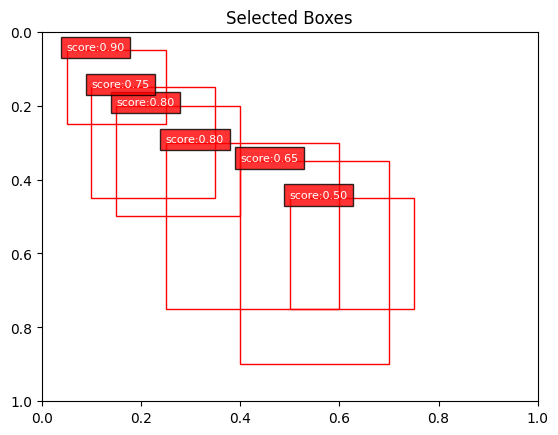

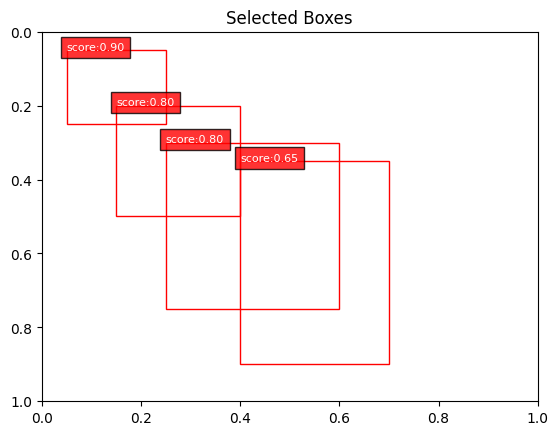

In [19]:
boxes = np.array(([10,10,50,50], [30,40,80,100], [100,90,150,150], [50,60,120,150], [20,30,70,90], [80,70,140,180]))
scores = np.array([0.9, 0.8, 0.5, 0.8, 0.75, 0.65])

selected_indices = non_max_suppression(boxes, scores)
print(selected_indices)
selected_boxes = boxes[selected_indices]

plot_boxes_with_scores(boxes, scores)
plot_boxes_with_scores(selected_boxes, scores[selected_indices])